In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data_purchase = pd.read_csv('QVI_purchase_behaviour.csv')
qvi_transaction_data = pd.read_excel('QVI_transaction_data.xlsx') 

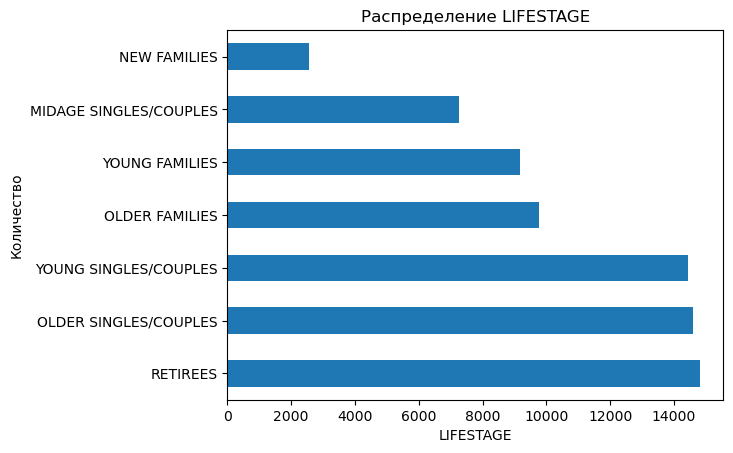

In [25]:
data_purchase['LIFESTAGE'].value_counts().plot(kind='barh')

# Настройка графика
plt.title('Распределение LIFESTAGE')
plt.xlabel('LIFESTAGE')
plt.ylabel('Количество')

# Отображение графика
plt.show()

Гистограмма преобладание более "пожилых" категорий клиентов. Самый высокий столбец на гистограмме соответствует категории "RETIREES", что делает ее наиболее распространенной категорией клиентов. Столбец для категории "NEW FAMILIES" имеет очень маленькую высоту, что может свидетельствовать о том, что в данном датасете мало клиентов в этой категории. Однако необходимо рассмотреть возможность ошибки в данных, которая может приводить к таким редким значениям.

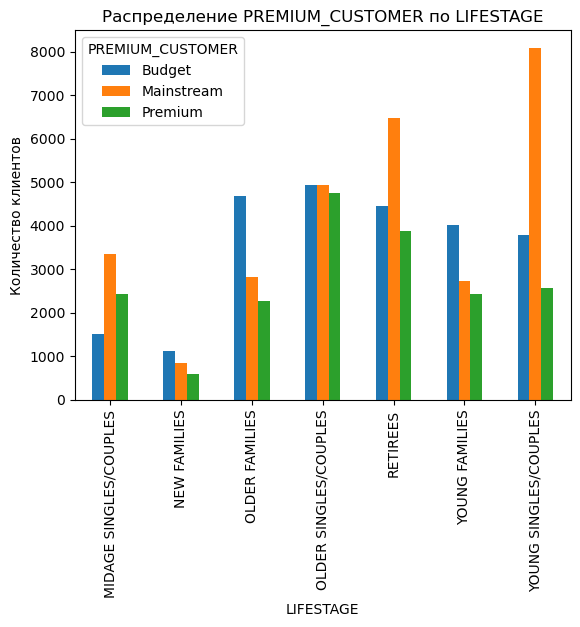

In [26]:
grouped = data_purchase.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size()

# Построение столбчатой диаграммы
grouped.unstack().plot(kind='bar')

# Настройка графика
plt.xlabel('LIFESTAGE')
plt.ylabel('Количество клиентов')
plt.title('Распределение PREMIUM_CUSTOMER по LIFESTAGE')

# Отображение графика
plt.show()

На графике видно, что в категории 'YOUNG SINGLES/COUPLES' преобладают клиенты сегмента 'Budget'. Это может указывать на то, что молодые люди склонны выбирать более дешевые варианты товаров и услуг.

Интересно, что в категории 'OLDER SINGLES/COUPLES' количество клиентов во всех сегментах примерно одинаковое. Это может свидетельствовать о том, что данная категория клиентов не имеет ярко выраженной принадлежности к какому-либо конкретному сегменту.

Анализ показывает, что количество "Premium" клиентов увеличивается с возрастом. Это, вероятно, связано с ростом доходов, позволяющим покупать более дорогие товары. Однако семейное положение также играет роль. "OLDER FAMILIES" в основном делают покупки в сегменте "Budget", в то время как "OLDER SINGLES/COUPLES" и "RETIREES" предпочитают "Premium" сегмент на 50% больше, чем "OLDER FAMILIES". Это может быть связано с тем, что семейные пары направляют свои расходы на нужды семьи.

График показывает, что в сегменте 'MAINSTREAM' покупают около 40% всех людей. Это дает понять, что магазин не относится к премиум или бюджетному сегменту.

In [11]:
# Объединение  таблиц  по  LYLTY_CARD_NBR  (аналог  LEFT JOIN в SQL)
merged_data = pd.merge(data_purchase, qvi_transaction_data, on='LYLTY_CARD_NBR', how='left')

# Вывод  объединенной  таблицы  (для  проверки)
print(merged_data.head())

   LYLTY_CARD_NBR              LIFESTAGE PREMIUM_CUSTOMER   DATE  STORE_NBR  \
0            1000  YOUNG SINGLES/COUPLES          Premium  43390          1   
1            1002  YOUNG SINGLES/COUPLES       Mainstream  43359          1   
2            1003         YOUNG FAMILIES           Budget  43531          1   
3            1003         YOUNG FAMILIES           Budget  43532          1   
4            1004  OLDER SINGLES/COUPLES       Mainstream  43406          1   

   TXN_ID  PROD_NBR                               PROD_NAME  PROD_QTY  \
0       1         5  Natural Chip        Compny SeaSalt175g         2   
1       2        58   Red Rock Deli Chikn&Garlic Aioli 150g         1   
2       3        52   Grain Waves Sour    Cream&Chives 210G         1   
3       4       106  Natural ChipCo      Hony Soy Chckn175g         1   
4       5        96          WW Original Stacked Chips 160g         1   

   TOT_SALES  
0        6.0  
1        2.7  
2        3.6  
3        3.0  
4        1.

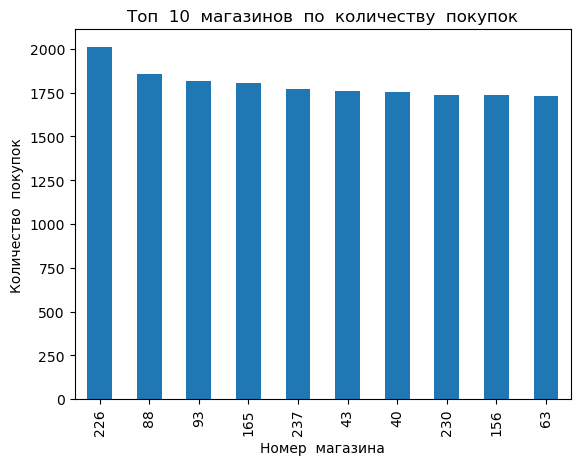

In [13]:
# Группировка  данных  по  магазинам  и  подсчет  количества  покупок  (аналог  COUNT в SQL)
store_counts = merged_data.groupby('STORE_NBR')['TXN_ID'].nunique()

store_counts = store_counts.sort_values(ascending=False)

# Вывод  топ  10  магазинов
top_10_stores = store_counts.head(10)

# Построение  столбчатой  диаграммы
top_10_stores.plot(kind='bar')

# Настройка  графика
plt.xlabel('Номер  магазина')
plt.ylabel('Количество  покупок')
plt.title('Топ  10  магазинов  по  количеству  покупок')

# Отображение  графика
plt.show()

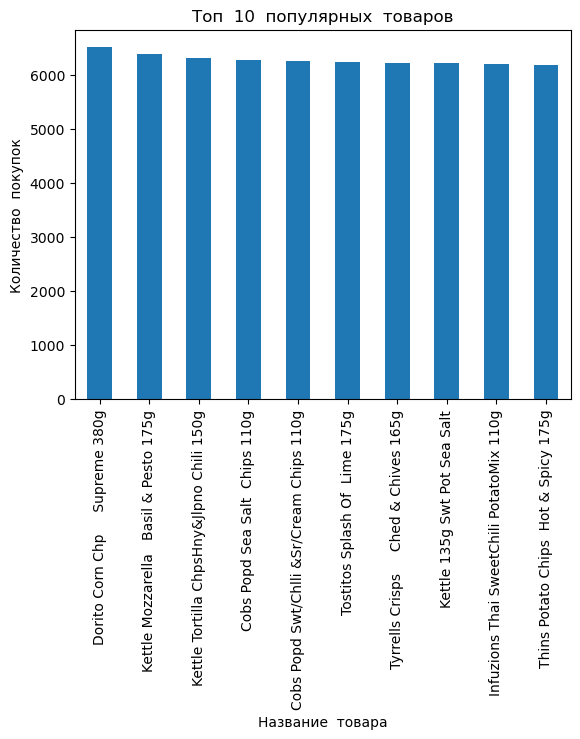

In [14]:
# Группировка  данных  по  товарам  и  подсчет  количества  покупок
product_counts = merged_data.groupby('PROD_NAME')['PROD_QTY'].sum()  # Суммируем количество товара

# Построение  столбчатой  диаграммы
product_counts.sort_values(ascending=False).head(10).plot(kind='bar')  # Сортируем и выводим топ 10

# Настройка  графика
plt.xlabel('Название  товара')
plt.ylabel('Количество  покупок')
plt.title('Топ  10  популярных  товаров')

# Отображение  графика
plt.show()

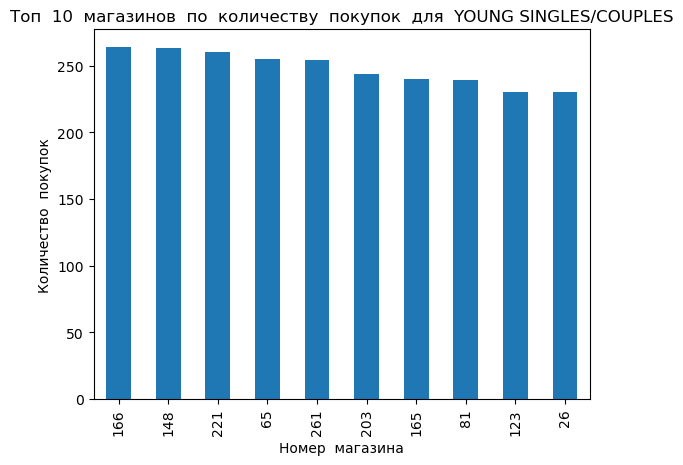

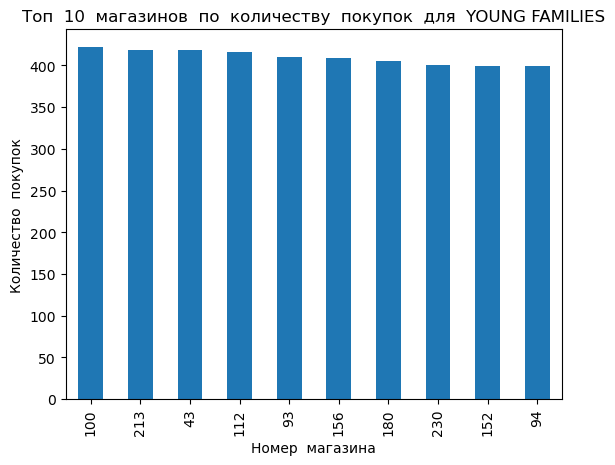

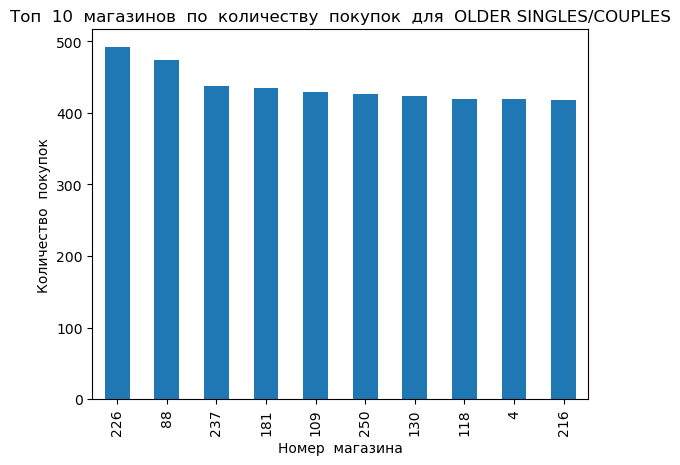

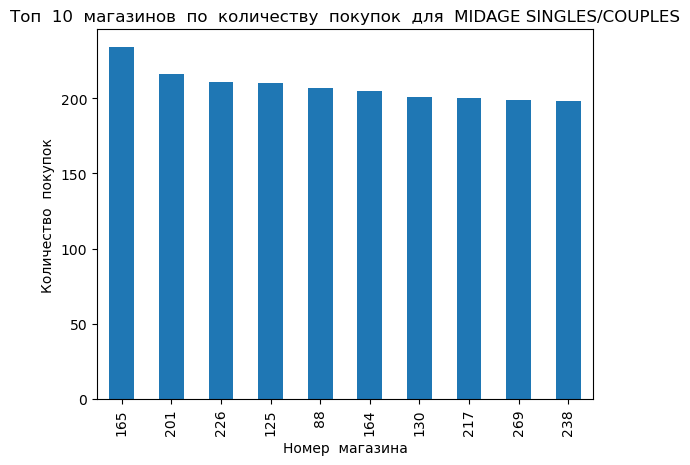

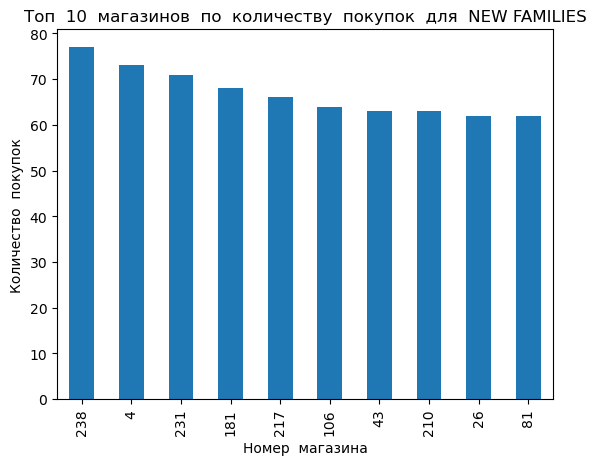

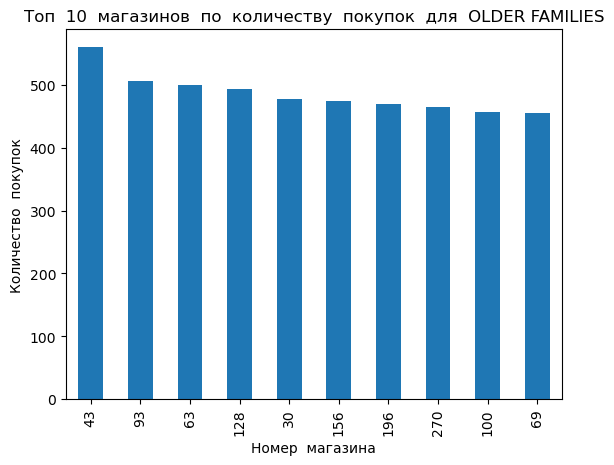

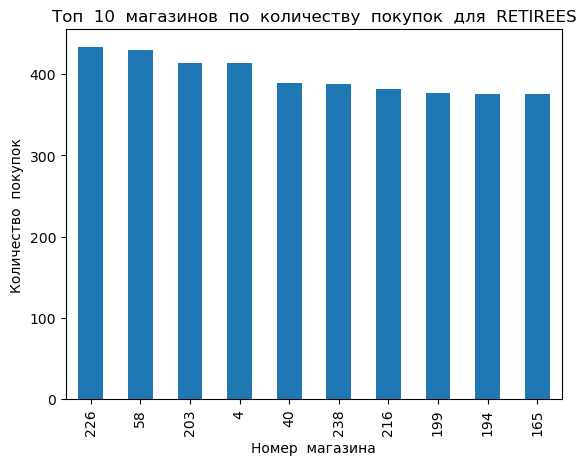

In [23]:
# Группировка  данных  по  LIFESTAGE,  STORE_NBR  и  подсчет  количества  покупок
store_counts_by_lifstage = merged_data.groupby(['LIFESTAGE', 'STORE_NBR'])['TXN_ID'].nunique()

# Построение  отдельных  графиков  для  каждой  категории  LIFESTAGE
for lifstage in merged_data['LIFESTAGE'].unique():
    # Сортировка  по  количеству  покупок  в  обратном  порядке
    store_counts_lifstage = store_counts_by_lifstage.loc[lifstage].sort_values(ascending=False)

    # Вывод  топ  10  магазинов
    top_10_stores_lifstage = store_counts_lifstage.head(10)

    # Построение  столбчатой  диаграммы
    top_10_stores_lifstage.plot(kind='bar')

    # Настройка  графика
    plt.xlabel('Номер  магазина')
    plt.ylabel('Количество  покупок')
    plt.title(f'Топ  10  магазинов  по  количеству  покупок  для  {lifstage}')

    # Отображение  графика
    plt.show()

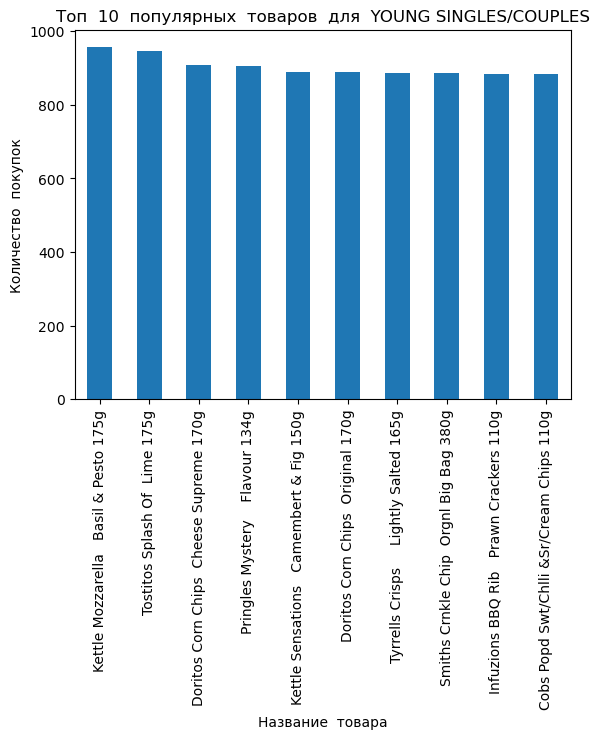

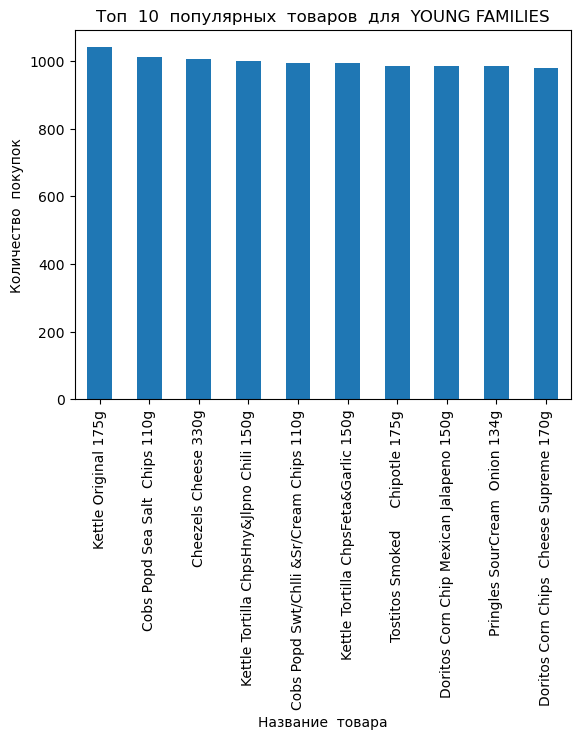

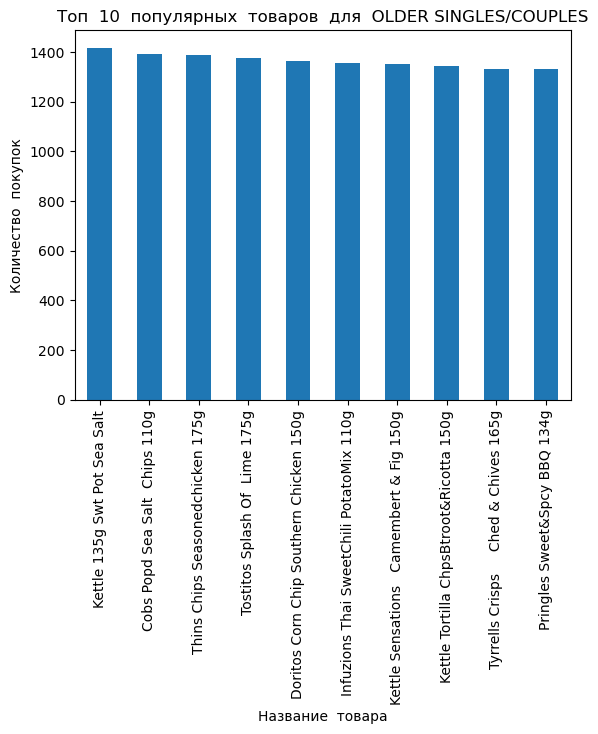

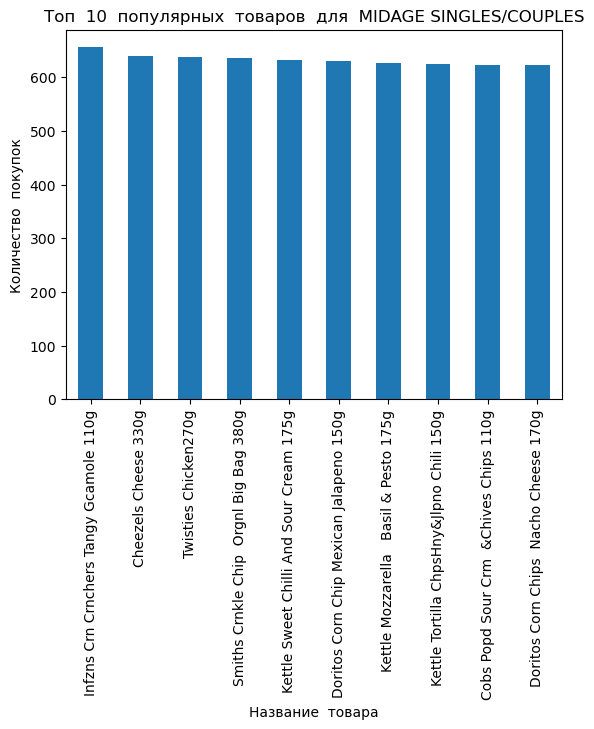

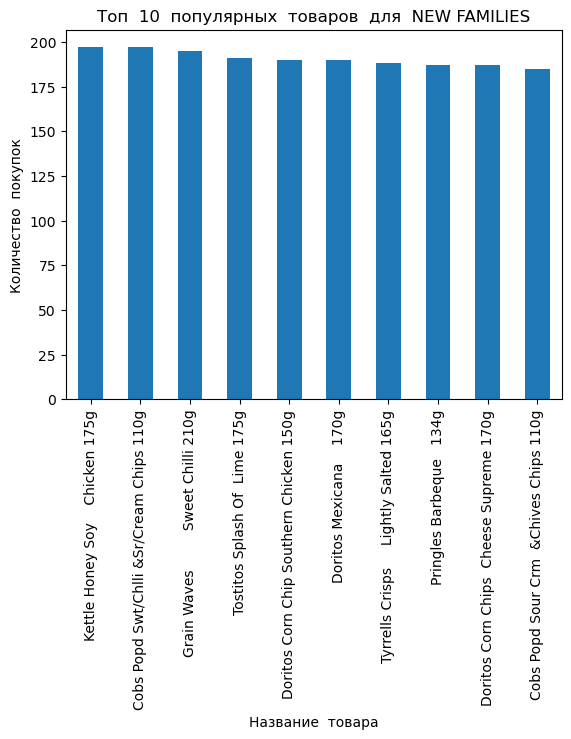

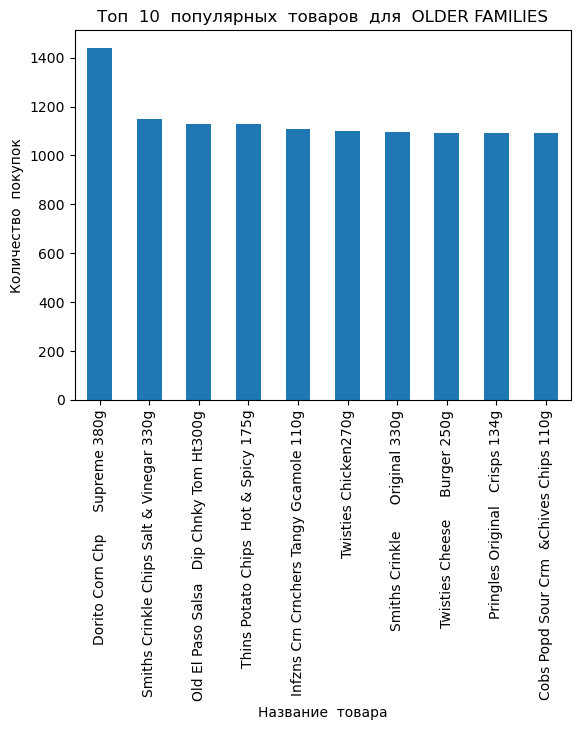

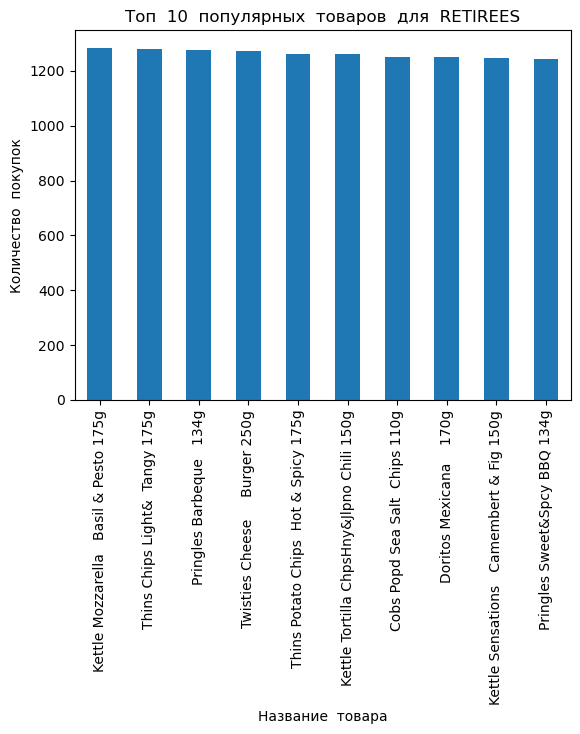

In [24]:
# Группировка  данных  по  LIFESTAGE,  PROD_NAME  и  подсчет  количества  покупок
product_counts_by_lifstage = merged_data.groupby(['LIFESTAGE', 'PROD_NAME'])['PROD_QTY'].sum()

# Построение  отдельных  графиков  для  каждой  категории  LIFESTAGE
for lifstage in merged_data['LIFESTAGE'].unique():
    product_counts_lifstage = product_counts_by_lifstage.loc[lifstage].sort_values(ascending=False).head(10).plot(kind='bar')
    plt.xlabel('Название  товара')
    plt.ylabel('Количество  покупок')
    plt.title(f'Топ  10  популярных  товаров  для  {lifstage}')
    plt.show()

В рамках исследования была проведена анализ потребительского поведения клиентов, сгруппированных по категориям "LIFESTAGE". Было определено распределение покупок по магазинам и выявлены самые популярные товары в каждой категории и в общем для всех клиентов.

Анализ потребительского поведения позволяет выявить интересные паттерны и тенденции. Например, молодые семьи склонны покупать более дешевые варианты товаров, в то время как пенсионеры предпочитают более дорогие бренды. Полученные данные могут быть использованы для улучшения маркетинговых стратегий, разработки целевых предложений и оптимизации ассортимента товаров. Например, магазину № 173, который является самым популярным среди молодых семей, рекомендуется увеличить количество товаров "Kettle Original 175g" и "Cobs Popd Sea Salt Chips 110g" в ассортименте.